<a href="https://colab.research.google.com/github/Crack-er-jack/60daysDSAchallenge/blob/main/mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9326,2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000
9327,2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800
9328,2023-03-17,278.260010,283.329987,276.320007,279.429993,279.429993,69492200
9329,2023-03-20,276.980011,277.480011,269.850006,272.230011,272.230011,43466600


In [5]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9326,2023-03-15,265.440002
9327,2023-03-16,276.200012
9328,2023-03-17,279.429993
9329,2023-03-20,272.230011


In [6]:
# Execution Time = 20s
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str):
    n = 3
    ret_df = pd.DataFrame(columns = ['Date', 'Target-3', 'Target-2', 'Target-1', 'Target'])
    i1 = -1
    i2 = -1
    i3 = -1
    l = len(dataframe)
    for i in range(l):
        if dataframe['Date'].iloc[i] == first_date_str:
            print(dataframe['Date'].iloc[i], i)
            i1 = i
            break
    i2 = i1 - 1
    i3 = i2 - 1
    print(i1, i2, i3)
    s = i1 + 1
    ri = 0
    for i in range(s, l):
        ret_df.loc[ri] = [dataframe['Date'].iloc[i], dataframe['Close'].iloc[i3], dataframe['Close'].iloc[i2], dataframe['Close'].iloc[i1], dataframe['Close'].iloc[i]]
        #print(dataframe['Date'].iloc[i], dataframe['Close'].iloc[i3], dataframe['Close'].iloc[i2], dataframe['Close'].iloc[i1], dataframe['Close'].iloc[i])
        if dataframe['Date'].iloc[i] == last_date_str:
            break
        i1 += 1
        i2 += 1
        i3 += 1
        ri += 1
    return ret_df

windowed_df = df_to_windowed_df(df, '1986-03-13', '2023-03-21')
windowed_df

1986-03-13 0
0 -1 -2


,Date,Target-3,Target-2,Target-1,Target
0,1986-03-14,272.230011,273.779999,0.097222,0.100694
1,1986-03-17,273.779999,0.097222,0.100694,0.102431
2,1986-03-18,0.097222,0.100694,0.102431,0.099826
3,1986-03-19,0.100694,0.102431,0.099826,0.098090
4,1986-03-20,0.102431,0.099826,0.098090,0.095486
...,...,...,...,...,...
9325,2023-03-15,248.589996,253.919998,260.790009,265.440002
9326,2023-03-16,253.919998,260.790009,265.440002,276.200012
9327,2023-03-17,260.790009,265.440002,276.200012,279.429993
9328,2023-03-20,265.440002,276.200012,279.429993,272.230011


In [7]:
copy_df = df

In [8]:
copy_df["Date"]= pd.to_datetime(copy_df["Date"])
copy_df['Date']

<ipython-input-8-ee3453f31104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df["Date"]= pd.to_datetime(copy_df["Date"])


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9326   2023-03-15
9327   2023-03-16
9328   2023-03-17
9329   2023-03-20
9330   2023-03-21
Name: Date, Length: 9331, dtype: datetime64[ns]

In [9]:
copy_df.index = copy_df.pop('Date')

In [10]:
copy_df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-03-15,265.440002
2023-03-16,276.200012
2023-03-17,279.429993


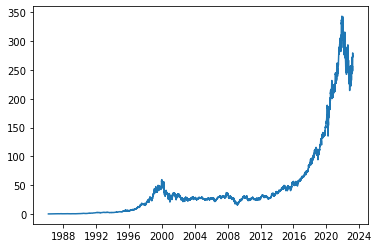

In [11]:
import matplotlib.pyplot as plt

plt.plot(copy_df.index, copy_df['Close'])

In [12]:
import numpy as np
def windowed_df_to_dates_X_y(windowed_dataframe):
    windowed_dataframe["Date"]= pd.to_datetime(windowed_dataframe["Date"])
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    y = df_as_np[:, -1]
    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_dates_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9330,), (9330, 3, 1), (9330,))

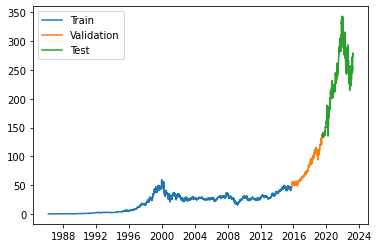

In [13]:
l = len(dates)
q80 = int(l * 0.8)
q90 = int(l * 0.9)

dates_train, X_train, y_train = dates[:q80], X[:q80], y[:q80]
dates_val, X_val, y_val = dates[q80:q90], X[q80:q90], y[q80:q90]
dates_test, X_test, y_test = dates[q90:], X[q90:], y[q90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
#execution time = 3m 25s
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)), # 3=> no. of days, 1 => univariate
                    layers.LSTM(64), # 64 => no. of neurons
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
234/234 [==============================] - 5s 9ms/step - loss: 99.8584 - mean_absolute_error: 4.4434 - val_loss: 1629.9510 - val_mean_absolute_error: 30.8671
Epoch 2/100
234/234 [==============================] - 1s 6ms/step - loss: 0.3956 - mean_absolute_error: 0.3387 - val_loss: 1410.8195 - val_mean_absolute_error: 27.8086
Epoch 3/100
234/234 [==============================] - 1s 6ms/step - loss: 0.3448 - mean_absolute_error: 0.3329 - val_loss: 1295.8431 - val_mean_absolute_error: 26.1168
Epoch 4/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3254 - mean_absolute_error: 0.3256 - val_loss: 1218.4652 - val_mean_absolute_error: 24.9928
Epoch 5/100
234/234 [==============================] - 2s 8ms/step - loss: 0.3327 - mean_absolute_error: 0.3398 - val_loss: 1195.8156 - val_mean_absolute_error: 24.6481
Epoch 6/100
234/234 [==============================] - 1s 6ms/step - loss: 0.3504 - mean_absolute_error: 0.3531 - val_loss: 1184.5104 - val_mean_absolute_